In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

In [2]:
sess = tf.InteractiveSession()   # interactive session을 연다. 

In [3]:
from libs import inception
net = inception.get_inception_model() # 구글에서 이미 training을 다한 inception에서
                                      # graph를 다운로드 받은 후에                                     
                                      # net에 저장함.       
##########################
#        net는 다음과 같은 dictionary가 반환횐다.         
#        net : dict
#        {'graph_def': graph_def, 'labels': synsets}
#        여기서 graph_def 는 tf.GraphDef 이고 
#        synsets   0-1000 사이의 정수 라벨을 이름과 매핑하고 있다. 
# 

FileNotFoundError: [Errno 2] No such file or directory: 'inception\\imagenet_comp_graph_label_strings.txt'

In [4]:
net['labels']    # net['labels']의 내용 확인.

NameError: name 'net' is not defined

In [ ]:
nb_utils.show_graph(net['graph_def'])  # net['graph_def']의 내용을 확인.
                                       # 참고 nb_utils는 repository에 올라온 코드로
                                       # 구글에서 만든 것은 아님. 내부적으로 
                                       # 텐서보드를 사용하고 있다. 

In [6]:
tf.import_graph_def(net['graph_def'], name='inception')

다음에 net['graph_def']내의 모든 연산과 기학습된 파라미터를 tensorflow의 자신의 default graph로 사용하라고 import_graph_def함수를 호출한다.

이 그래프내의 operation들을 살펴보자

In [7]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [8]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [10]:
print(x.get_shape())

<unknown>


In [11]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [12]:
print(softmax.get_shape())

(?, 1008)


In [13]:
import os        # os에 관계된 라이브러리들을 import한다.  
dirname = 'IU'   # 디렉토리명(dirname)을 'IU'로 한다. 

# dirname이라는 디렉토리 안에 있는 모든 파일을 filenames에 저장한다. 
filenames = [os.path.join(dirname, fname)   # 밑에서 얻은 파일들을 [](배열)안에 추가 
             for fname in os.listdir(dirname)]   #dirname내의 모든 파일명을 얻는다. 

In [14]:
img = plt.imread(filenames[1])

0 255


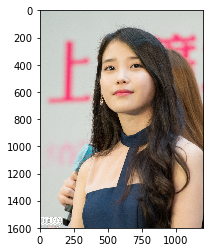

In [15]:
plt.imshow(img)
print(img.min(), img.max())

In [16]:
img2 = inception.preprocess(img)
print(img.shape), print(img2.shape)

(1600, 1200, 3)
(299, 299, 3)


C:\Program Files\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(None, None)

In [17]:
print(img2.min(), img2.max())

-117.0 137.995


In [18]:
img_4d = img2[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


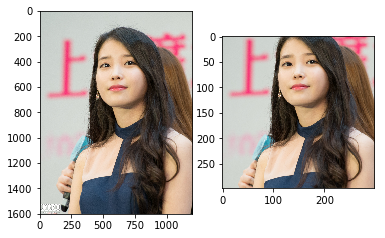

In [19]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)

# Note that unlike the lecture, we have to call the `inception.deprocess` function
# so that it adds back the mean!
axs[1].imshow(inception.deprocess(img2))

In [33]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))
print(softmax.eval(feed_dict={x: img_4d}))
print(res)

[[  4.95659016e-08   2.05773776e-09   1.00865947e-07 ...,   4.95622139e-08
    4.95678876e-08   4.95655215e-08]
 [  2.33392594e-08   5.67136171e-10   9.67773062e-08 ...,   2.33375683e-08
    2.33402382e-08   2.33391262e-08]
 [  3.91054833e-08   8.66598238e-10   2.49783994e-07 ...,   3.91025736e-08
    3.91070465e-08   3.91051849e-08]
 ..., 
 [  1.65966640e-07   2.80414287e-08   9.80644813e-07 ...,   1.65954617e-07
    1.65973916e-07   1.65965858e-07]
 [  1.79656979e-07   3.79684941e-08   1.94388122e-06 ...,   1.79643948e-07
    1.79664852e-07   1.79656112e-07]
 [  3.28728788e-07   1.15220686e-07   5.94644098e-06 ...,   3.28705255e-07
    3.28743511e-07   3.28727509e-07]]
[[  4.95659016e-08   2.05773776e-09   1.00865947e-07 ...,   4.95622139e-08
    4.95678876e-08   4.95655215e-08]
 [  2.33392594e-08   5.67136171e-10   9.67773062e-08 ...,   2.33375683e-08
    2.33402382e-08   2.33391262e-08]
 [  3.91054833e-08   8.66598238e-10   2.49783994e-07 ...,   3.91025736e-08
    3.91070465e-08   

In [34]:
res.shape

(16, 1008)

In [35]:
# Note that this is one way to aggregate the different probabilities.  We could also
# take the argmax.
res = np.mean(res, 0)
res = res / np.sum(res)

In [29]:
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.26227975, (867, 'lipstick')), (0.21685238, (899, 'wig')), (0.074234225, (589, 'seat belt')), (0.071853004, (967, 'Band Aid')), (0.034974735, (535, 'sunglasses'))]


In [32]:
res.shape

(1008,)

In [37]:
print(res)

[  1.01178955e-07   1.69177916e-08   1.03401158e-06 ...,   1.01171629e-07
   1.01183325e-07   1.01178443e-07]
